# Hello!  

Name: Mahdi (Matt) Ghadimi  
N14369173  
mg8786@nyu.edu  

This notebook contains my Week 6 Take-Home Assignment for the Fall 2025 Data Science Bootcamp.  

Mahdi (Matt) Ghadimi_Week 6 Take-Home Assignment_Fall 2025 Data Science Bootcamp.ipynb

# (Homework) Week 6 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** Mahdi (Matt) Ghadimi\
**Email:** mg8786@nyu.edu

---

### Problem 1: Dataset Splitting

1. You have recordings of 44 phones from 100 people; each person records ~200 phones/day for 5 days.
   - Design a valid training/validation/test split strategy that ensures the model generalizes to **new speakers**.

2. You now receive an additional dataset of 10,000 phone recordings from **Kilian**, a single speaker.
   - You must train a model that performs well **specifically for Kilian**, while also maintaining generalization.

*Describe your proposed split strategy and reasoning.* (Theory)

# Problem 1-1: Recordings of 44 phones from 100 people:
When splitting this dataset, the key idea is to separate by speaker, not by individual recordings. If the same person appears in both training and testing, the model could accidentally learn that person’s voice and the evaluation wouldn’t show true generalization.

A reasonable split would be something like:

- Training: recordings from about 70 different people

- Validation: recordings from 15 new people

- Test: recordings from 15 completely unseen people

All of each person’s recordings stay in a single split. This way, the test set measures how well the model performs on people it has never heard before, which is the realistic scenario.

# Task 1-2: Additional dataset: Kilian’s 10,000 recordings:

Since the goal is to perform especially well for Kilian, but still keep generalization to other speakers, the best approach is:

- Train a base model on the original 70-speaker training set.

- Fine-tune the model using Kilian’s data, but keep a small portion of the original training data mixed in during fine-tuning.

  - This prevents the model from “forgetting” how to handle other speakers.

- Split Kilian’s data into:

  - Train: ~80%

  - Validation: ~10%

  - Test: ~10%

Kilian’s test set stays completely separate so we can measure how much the model actually improved for him.

In the end, we evaluate the model on:

- the original test set (unseen speakers) → checks generalization

- Kilian’s own test set → checks personalized performance



----------------------



### Problem 2: K-Nearest Neighbors

1. **1-NN Classification:** Given dataset:

   Positive: (1,2), (1,4), (5,4)

   Negative: (3,1), (3,2)

   Plot the 1-NN decision boundary and classify new points visually.

2. **Feature Scaling:** Consider dataset:

   Positive: (100,2), (100,4), (500,4)

   Negative: (300,1), (300,2)

   What would the 1-NN classify point (500,1) as **before and after scaling** to [0,1] per feature?

3. **Handling Missing Values:** How can you modify K-NN to handle missing features in a test point?

4. **High-dimensional Data:** Why can K-NN still work well for images even with thousands of pixels?


## Answer to Problem 2-1:

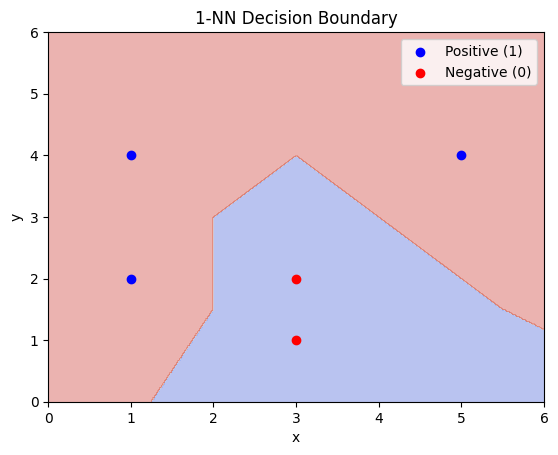

In [1]:
#Todo
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Dataset
X = np.array([
    [1,2], [1,4], [5,4],   # Positive
    [3,1], [3,2]           # Negative
])
y = np.array([1,1,1, 0,0])   # 1 = Positive, 0 = Negative

# Train 1-NN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

# Plot decision boundary
x_min, x_max = 0, 6
y_min, y_max = 0, 6
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.4)
plt.scatter(X[:3,0], X[:3,1], color='blue', label='Positive (1)')
plt.scatter(X[3:,0], X[3:,1], color='red', label='Negative (0)')
plt.legend()
plt.title("1-NN Decision Boundary")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

- 1-NN assigns each location to whichever labeled point is closest.
- The colored regions show which class a point belongs to based on the nearest neighbor.

## Answer to Problem 2-2:

In [3]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

X = np.array([
    [100,2], [100,4], [500,4],    # Positive
    [300,1], [300,2]              # Negative
])
y = np.array([1,1,1,0,0])
test_point = np.array([[500,1]])

# --- Before scaling ---
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
pred_before = knn.predict(test_point)

# --- After scaling ---
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test_point)

knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_scaled, y)
pred_after = knn2.predict(test_scaled)

pred_before, pred_after


(array([1]), array([0]))

- Before scaling: classified as Positive (distance in x dominates).

- After scaling: classified as Negative (scaled y-difference matters).
This shows why scaling is important in distance-based models.

## Answer to Problem 2-3:

A simple fix is to compute distance using only features that are present.
Example: if a test point is missing feature 2, compute distance using only feature 1.
Another option is to impute the missing value (mean, median, or using neighbors) before K-NN.
Many implementations ignore missing dimensions and average over remaining features.

## Answer to Problem 2-4:

K-NN can still work for images because:

- Nearby images in pixel-space tend to be visually similar.

- Large image datasets provide many neighbors from the same class.

- We often use feature extraction, so K-NN works on compressed representations where similar images stay close.

-------------------------------------


### Problem 3: Part 1

You are given a fully trained Perceptron model with weight vector **w**, along with training set **D_TR** and test set **D_TE**.

1. Your co-worker suggests evaluating $h(x) = sign(w \cdot x)$ for every $(x, y)$ in D_TR and D_TE. Does this help determine whether test error is higher than training error?
2. Why is there no need to compute training error explicitly for the Perceptron algorithm?

## Answer to Problem 3-1-1:
Yes, evaluating h(x) on both datasets will let us measure how many points are classified correctly in training and test.  
This tells us whether the test error is larger than the training error. If the perceptron learned a perfect separator on training data (as it should when data is linearly separable), training error will be zero, but test error may still be higher if new points don’t lie perfectly on the learned boundary.

## Answer to Problem 3-1-2:
For linearly separable data, the perceptron only updates weights when it makes a mistake.  
Once training finishes, that means no training examples are misclassified anymore, so training error is automatically zero.  
Since the algorithm stops making updates only when all training points are correctly classified, we already know the training error without computing it directly.

### Problem 3: Two-point 2D Dataset (Part 2)

Run the Perceptron algorithm **by hand or in code** on the following data:

1. Positive class: (10, -2)
2. Negative class: (12, 2)

Start with $w_0 = (0, 0)$ and a learning rate of 1.

- Compute how many updates are required until convergence.
- Write down the sequence of $w_i$ vectors.

## Answer to problem 3-2:

Positive: (10, −2): y = +1  
Negative: (12, 2): y = −1  
Start: w0 = (0, 0), learning rate = 1

## Updates:
- w0 = (0, 0)
- Predict (10, −2) wrong: w1 = (0,0) + (10,−2) = (10, −2)
- Predict (12, 2) wrong: w2 = (10,−2) − (12,2) = (−2, −4)
- Predict (10, −2) wrong: w3 = (−2,−4) + (10,−2) = (8, −6)
- Predict (12, 2) wrong: w4 = (8,−6) − (12,2) = (−4, −8)
- Predict (10, −2) wrong: w5 = (−4,−8) + (10,−2) = (6, −10)

This pattern repeats...

## Answer:
The two points are not linearly separable through the origin, so updates continue without stopping.  
The weight vectors keep cycling.

In [5]:
import numpy as np

X = np.array([[10,-2],[12,2]])
y = np.array([1,-1])
w = np.array([0.0,0.0])

for i in range(10):
    for xi, yi in zip(X,y):
        if np.sign(np.dot(w,xi)) != yi:
            w = w + yi*xi
            print(w)

[10. -2.]
[-2. -4.]
[ 8. -6.]
[-4. -8.]
[  6. -10.]
[ -6. -12.]
[  4. -14.]
[ -8. -16.]
[  2. -18.]


---------------------------
### Problem 4: Reconstructing the Weight Vector

Given the log of Perceptron updates:

| x | y | count |
|---|---|--------|
| (0, 0, 0, 0, 4) | +1 | 2 |
| (0, 0, 6, 5, 0) | +1 | 1 |
| (3, 0, 0, 0, 0) | -1 | 1 |
| (0, 9, 3, 6, 0) | -1 | 1 |
| (0, 1, 0, 2, 5) | -1 | 1 |

Assume learning rate = 1 and initial weight $w_0 = (0, 0, 0, 0, 0)$.

Compute the final weight vector after all updates.

In [6]:
#Todo
x = [
    (0,0,0,0,4),
    (0,0,6,5,0),
    (3,0,0,0,0),
    (0,9,3,6,0),
    (0,1,0,2,5)
]
y = [1,1,-1,-1,-1]
count = [2,1,1,1,1]
w = [0,0,0,0,0]

for i in range(5):
    for _ in range(count[i]):
        for k in range(5):
            w[k] = w[k] + y[i]*x[i][k]

print(w)

[-3, -10, 3, -3, 3]


### Problem 5: Visualizing Perceptron Convergence

Implement a Perceptron on a small 2D dataset with positive and negative examples.

- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.

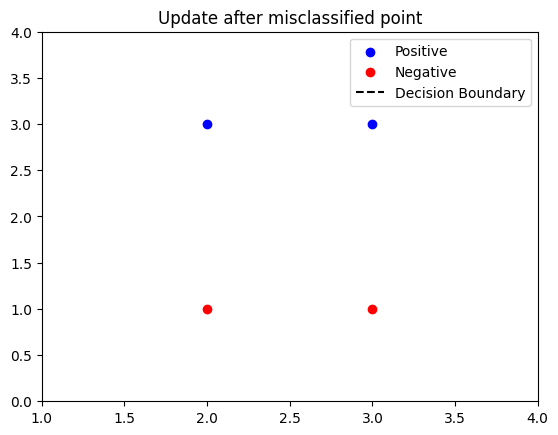

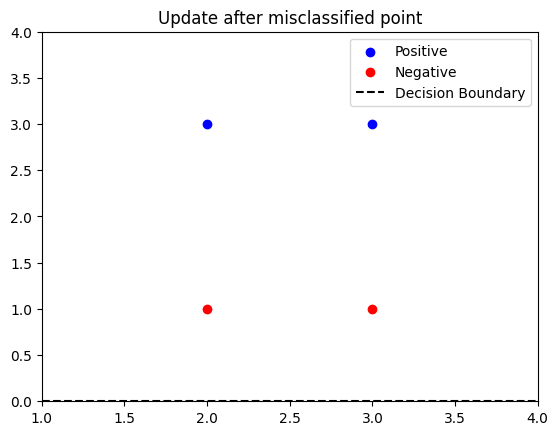

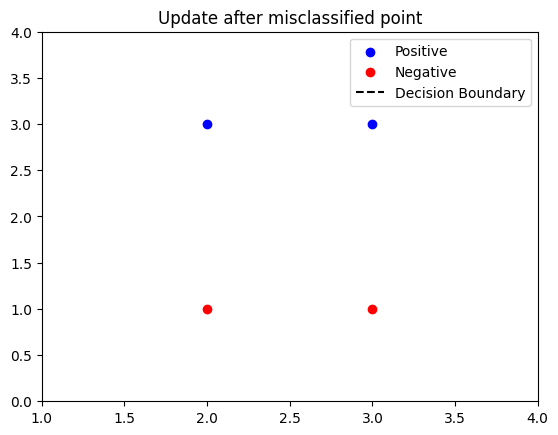

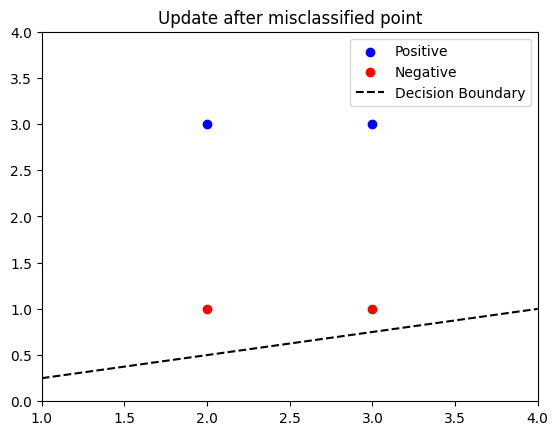

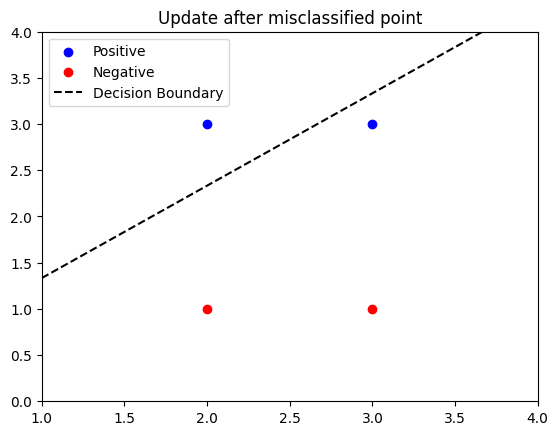

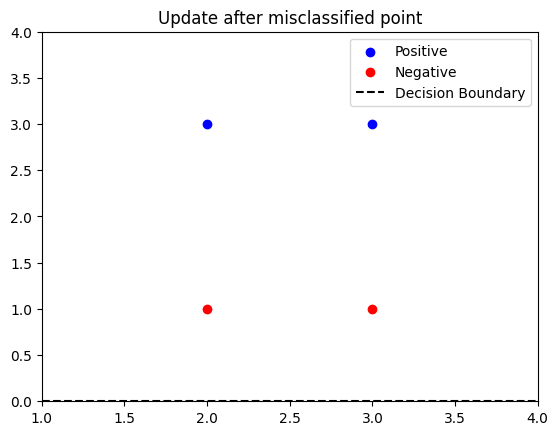

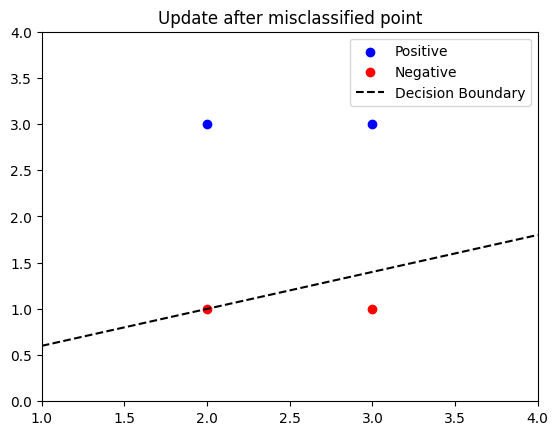

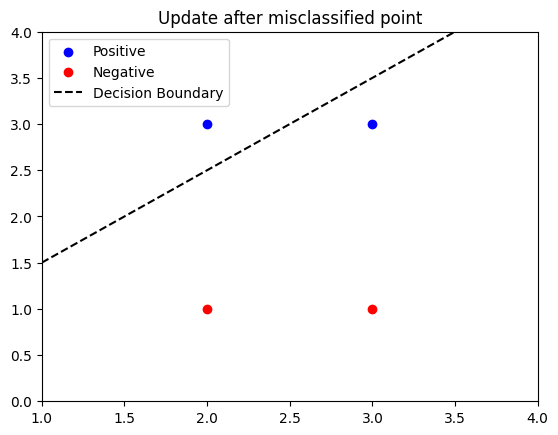

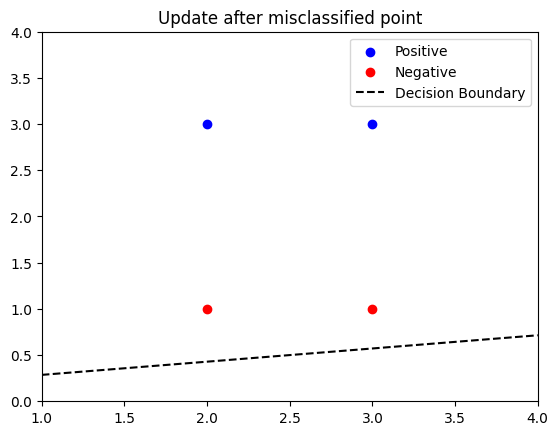

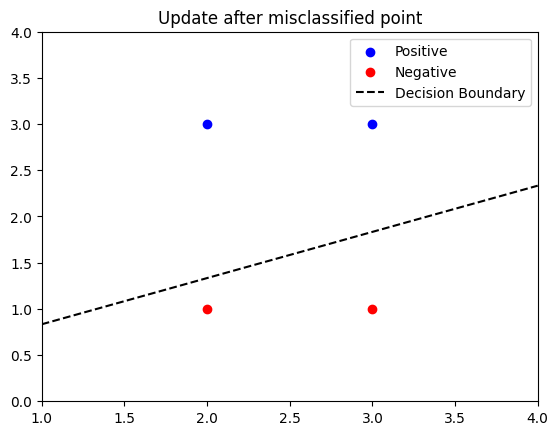

Final weights: [-2. -3.  6.]


In [7]:
#Todo
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[2,3],[3,3],[2,1],[3,1]])
y = np.array([1,1,-1,-1])

# Add bias term
X_bias = np.hstack([np.ones((X.shape[0],1)), X])
w = np.zeros(3)
lr = 1

def plot_decision_boundary(w, X, y, title=""):
    plt.figure()
    plt.scatter(X[y==1,0], X[y==1,1], color='blue', label='Positive')
    plt.scatter(X[y==-1,0], X[y==-1,1], color='red', label='Negative')

    if w[2] != 0:
        x_vals = np.array([X[:,0].min()-1, X[:,0].max()+1])
        y_vals = -(w[0] + w[1]*x_vals)/w[2]
        plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')

    plt.xlim(X[:,0].min()-1, X[:,0].max()+1)
    plt.ylim(X[:,1].min()-1, X[:,1].max()+1)
    plt.legend()
    plt.title(title)
    plt.show()

max_epochs = 10
for epoch in range(max_epochs):
    errors = 0
    for xi, yi in zip(X_bias, y):
        pred = np.sign(np.dot(w, xi))
        if pred != yi:
            w += lr * yi * xi
            errors += 1
            plot_decision_boundary(w, X, y, title=f"Update after misclassified point")
    if errors == 0:
        break

print("Final weights:", w)